In [120]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

In [121]:
path = "/home/maria/data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports"

In [122]:
def listFiles(path):
    """
    Retorna una lista de archivos de una ruta (path) dada.
    :param path: Ruta del directorio donde se encuentran los archivos a listar
    :return filenames
    """
    return [obj.name for obj in Path(path).iterdir() if obj.is_file()]

In [123]:
def getData(country="Venezuela",date="05-15-2020",path=path,encoding="ISO-8859-1"):
    """
    Obtiene los datos desde una fecha y para un país, de la ruta definida de archivos csv.
    :param country: País que se quiere generar el dataframe
    :param date: Fecha desde que se va a tomar los datos para el dataframe
    :param path: Ruta donde se encuentran los archivos csv
    :param encoding: Codificación a la que se encuentran los archivos csv.
    :return df: Dataframe con los datos extraídos de los csv desde una fecha dada y para un país.
    """
    # Se obtiene los nombres de los archivos.
    lista = [file for file in listFiles(path) if file.split(".")[-1] == "csv"]
    # Se lee los archivos csv y se convierten en varios dataframe en un diccionario ordenados por fecha.
    df = {item.split(".")[0]:pd.read_csv(path+ "/" +item,encoding=encoding) for item in lista}
    # Se lista las fechas
    dates = [item.split(".")[0] for item in lista]
    # Se renombras las columnas de los dataframes.
    for i,date in enumerate(dates):
        if "Country_Region" in list(df[date].columns) or "Province_State" in list(df[date].columns) or "Last_Update" in list(df[date].columns):
            df[date].rename(columns={"Country_Region": 'Country/Region',"Last_Update":"Last Update","Province_State": "Province/State"},inplace=True)
    # Se convierten las fechas en datetime y se ordenan
    dates2 = sorted([datetime.datetime.strptime(date,"%m-%d-%Y") for date in dates])
    # Se ordena los dataframes en una lista
    data = [df[d.strftime("%m-%d-%Y")][df[d.strftime("%m-%d-%Y")]["Country/Region"] == country] for d in dates2 if d >= datetime.datetime.strptime(date,"%m-%d-%Y")]
    #Se concatena los dataframes en uno sólo y se retorna
    data_df = pd.concat(data)
    return data_df

In [124]:
def AddColumnRate(df,column_name):
    """
    Agrega una columna al dataframe, dicha columna es la diferencia entre la próxima row y el row actual
    :param df: DataFrame a agregar la columna.
    :param column_name: Columna a la que se quiere calcular la diferencia.
    :return df: Retorna un dataframe con la columna adicional que tiene la diferencia por día.
    """
    elements = []
    # Se recorre el dataframe
    for i in range(len(df)):
        # Si es la fila inicial se toma su valor
        if i == 0:
            elements.append(df.iloc[0][column_name])
        else:
            # Si no es el inicial se calcula la diferencia de su valor actual con el anterior
            elements.append(df.iloc[i][column_name] - df.iloc[i-1][column_name])
    # Se agrega la lista al dataframe
    df.insert(4,f"rate_{column_name}",elements)
    return df

In [125]:
def DataProcessor(df):
    """
    Se remueve columnas del dataframe, se define el index, se reemplaza los NA y se agrega dos columnas.
    :param df: Dataframe a procesar
    :return df: DataFrame procesado
    """
    # Se obtiene el nombre de una columna a remover
    remove = list(df.columns)[0]
    # Se remueve la lista de columnas
    df.drop(labels=["Province/State","Lat","Long_","Admin2","Lat","Long_","Combined_Key","FIPS",remove],axis=1,inplace=True)
    df.drop(labels=[df.columns[-2]],axis=1,inplace=True)
    # Se reemplaza NA por 0.
    df.fillna(0,inplace=True)
    # Se conviernte las fechas que son string a datetime
    df['Last Update']= pd.to_datetime(df['Last Update'])
    # Se define las fechas como indice
    df.set_index("Last Update",inplace=True)
    # Se calcula los rate de confirmados y muertes
    df = AddColumnRate(df,"Confirmed")
    df = AddColumnRate(df,"Deaths")
    return df

In [126]:
def PlotData(df,column,title):
    """
    Gráfica una columna del dataframe
    :param df: Dataframe a gráficar
    :param column: Columna a graficar
    :param title: Título de la gŕafica
    """
    # Se recorre los países de la lista
    for i,country in enumerate(countries):
        if i == 0:
            # Si es el primer país se define el título de la gráfica
            df[country][column].plot(label=country,figsize=(16,8),title=title)
        else:
            df[country][column].plot(label=country,figsize=(16,8))
    plt.legend();

In [127]:
# Paises a analizar
countries = ["Venezuela","Colombia","Ecuador","Peru", "Chile"]


# In[9]:
# Fecha de extracción de datos
date= "05-15-2020"


# In[10]:
# Construcción de los dataframes
df = {country: getData(country=country,date=date) for country in countries}

# In[11]:
# Procesar los datos
df2 = {country: DataProcessor(df[country]) for country in countries}

In [128]:
country_="Peru"

In [129]:
df2[country_].sort_values("Last Update", ascending=False)

,Country/Region,Confirmed,Deaths,Active,rate_Deaths,rate_Confirmed
Last Update,,,,,,
2020-05-18 02:32:21,Peru,92273,2648,61004,125,3732
2020-05-17 02:32:32,Peru,88541,2523,57746,131,4046
2020-05-16 02:32:19,Peru,84495,2392,54956,125,3891
2020-05-15 02:33:02,Peru,80604,2267,53186,98,4298
2020-05-14 03:32:28,Peru,76306,2169,49813,112,4247
2020-05-13 03:32:26,Peru,72059,2057,46678,96,3237
2020-05-12 03:32:27,Peru,68822,1961,44455,72,1515
2020-05-11 02:32:30,Peru,67307,1889,44069,75,2292
2020-05-10 02:32:30,Peru,65015,1814,42955,100,3168


In [130]:
plotcountry = "Venezuela"

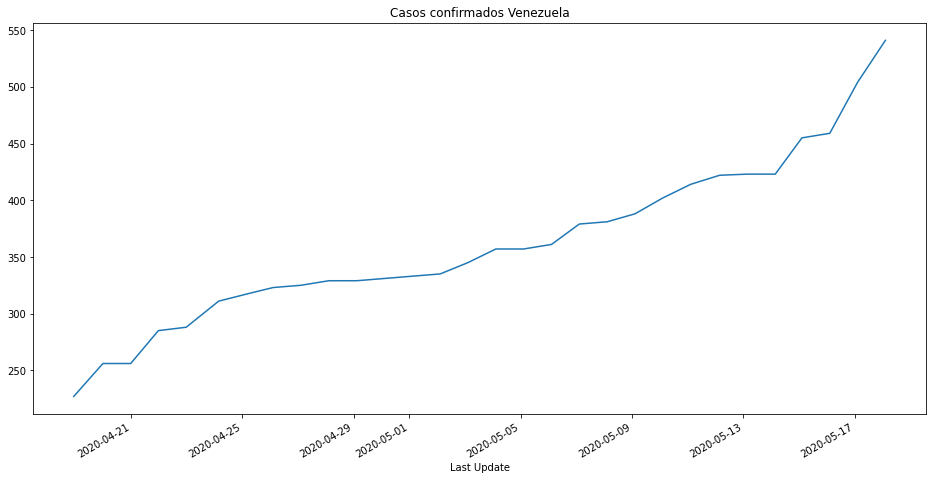

In [131]:
df[plotcountry].Confirmed.plot(label="plotcountry",figsize=(16,8),title="Casos confirmados "+plotcountry)

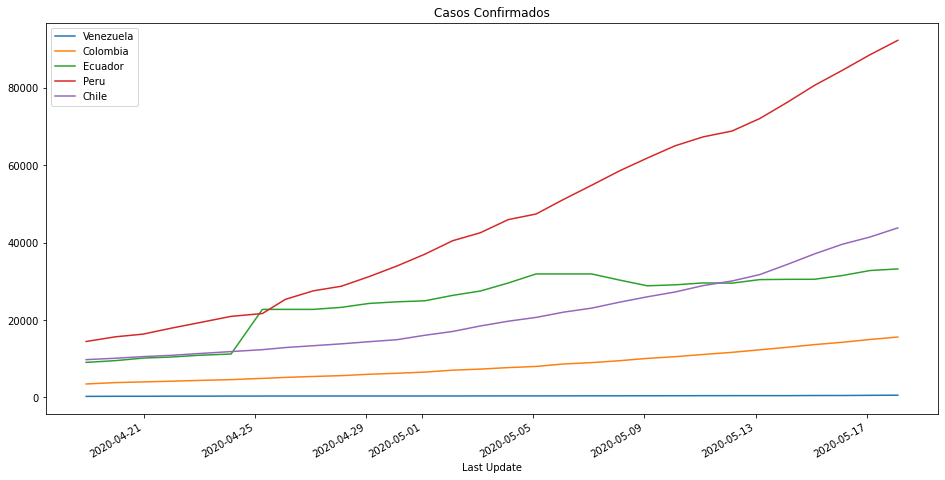

In [132]:
PlotData(df2,"Confirmed","Casos Confirmados")

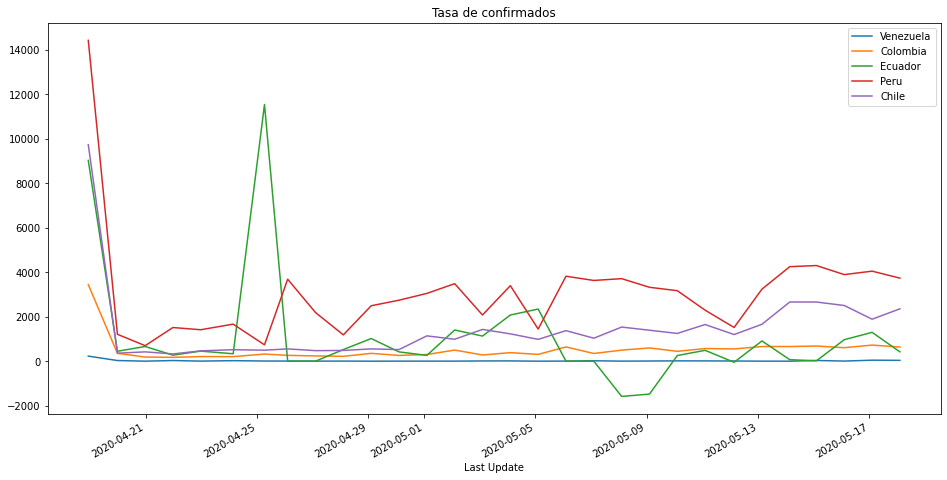

In [133]:
PlotData(df2,"rate_Confirmed","Tasa de confirmados")

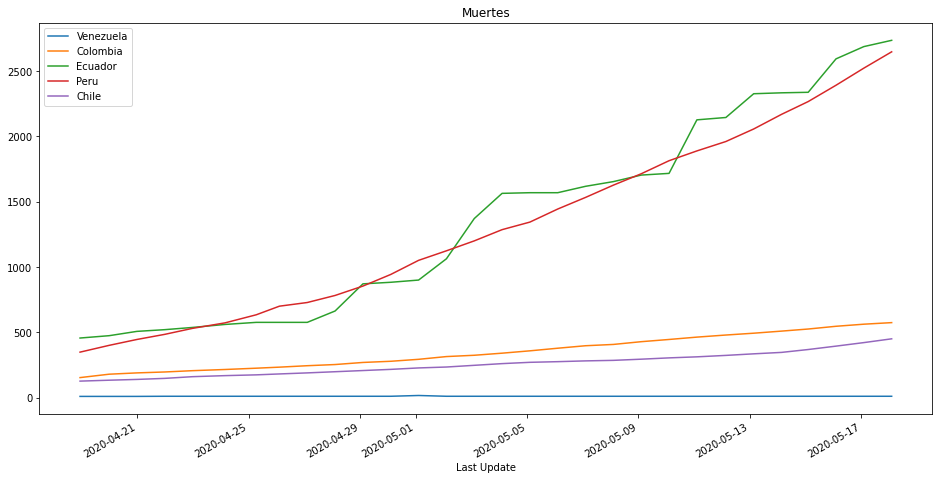

In [134]:
PlotData(df2,"Deaths","Muertes")

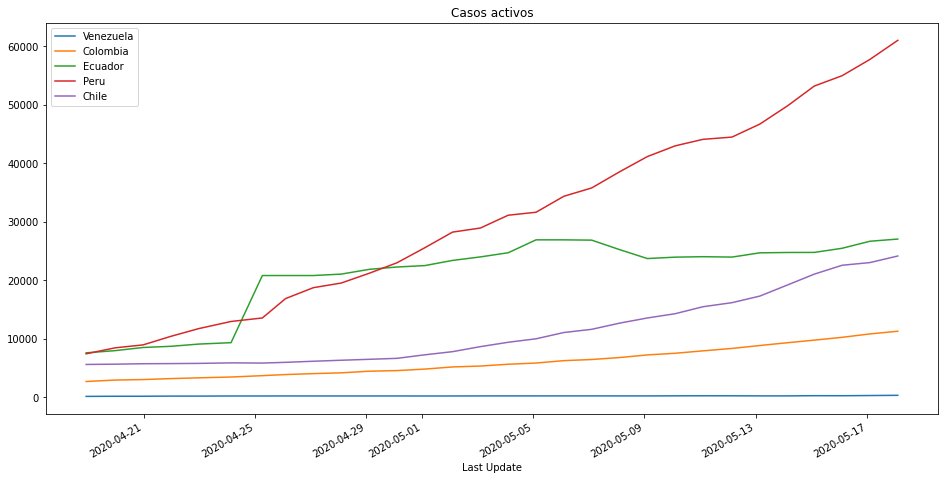

In [135]:
PlotData(df2,"Active","Casos activos")